In [4]:
import pandas as pd
df = pd.read_csv('../data_preprocessing/pivoted_cancer.csv')
df.columns

Index(['State', 'State-County', '1,1,2,2-Tetrachloroethane', '1,3-Butadiene',
       '1,4-Dichlorobenzene', '2,2,4-Trimethylpentane', 'Acetaldehyde',
       'Acrolein', 'Ammonia', 'Arsenic Compounds', 'Benzene',
       'Beryllium Compounds', 'Cadmium Compounds', 'Carbon Dioxide',
       'Carbon Monoxide', 'Carbon Tetrachloride', 'Chlorobenzene',
       'Chloroform', 'Chromium Compounds', 'Cobalt Compounds', 'Cumene',
       'Ethyl Chloride', 'Ethylbenzene', 'Formaldehyde', 'Hexane',
       'Lead Compounds', 'Manganese Compounds', 'Mercury Compounds', 'Methane',
       'Methanol', 'Methyl Isobutyl Ketone', 'Methylene Chloride',
       'Naphthalene', 'Nickel Compounds', 'Nitrogen Oxides', 'Nitrous Oxide',
       'PM10 Primary (Filt + Cond)', 'PM2.5 Primary (Filt + Cond)', 'Phenol',
       'Polycyclic Organic Matter', 'Propionaldehyde', 'Selenium Compounds',
       'Styrene', 'Sulfur Dioxide', 'Toluene', 'Vinyl Chloride',
       'Volatile Organic Compounds', 'Xylenes (Mixed Isomers)', 'Da

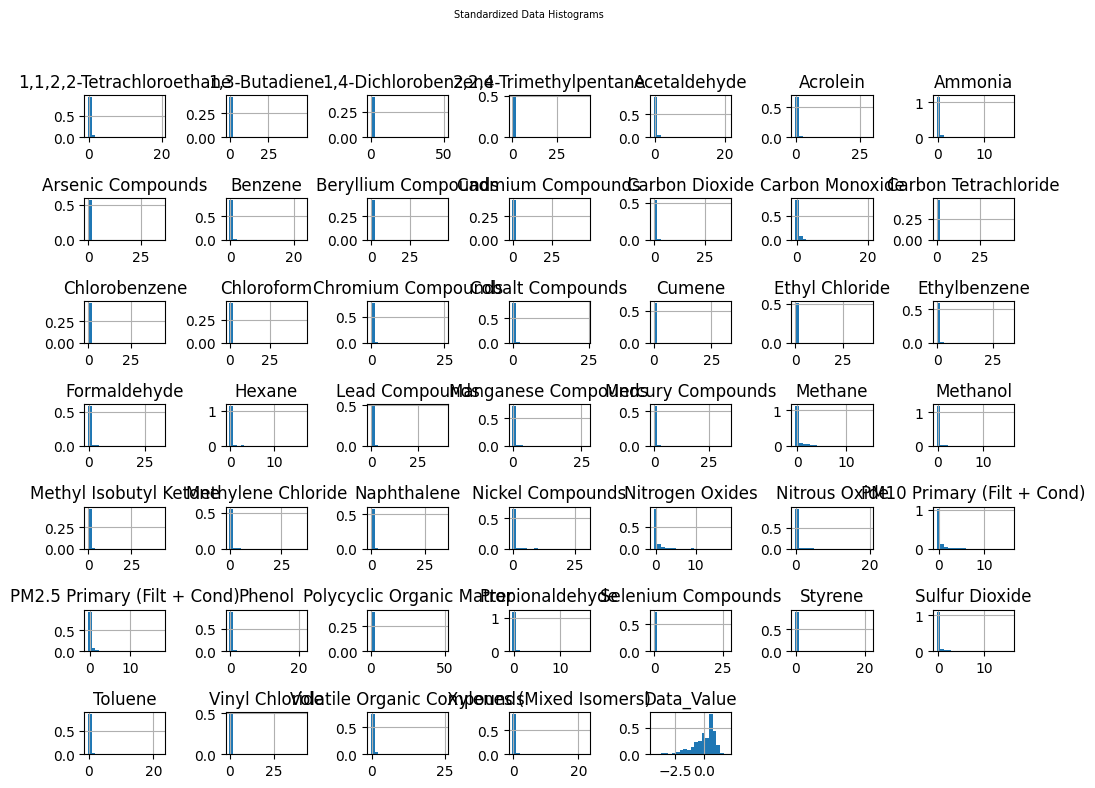

In [5]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Select only the numerical columns
numerical_data = df.select_dtypes(include=[np.number])

# Standardize the numerical data
scaler = StandardScaler()
standardized_data = pd.DataFrame(scaler.fit_transform(numerical_data), columns=numerical_data.columns)

# Plot the histograms for the standardized data
standardized_data.hist(bins=20, figsize=(10, 8), density=True)

# Adjust the layout to add padding between plots
plt.suptitle("Standardized Data Histograms", fontsize=7)  # Adjust font size
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Add padding below the title

# Show the histograms
plt.show()

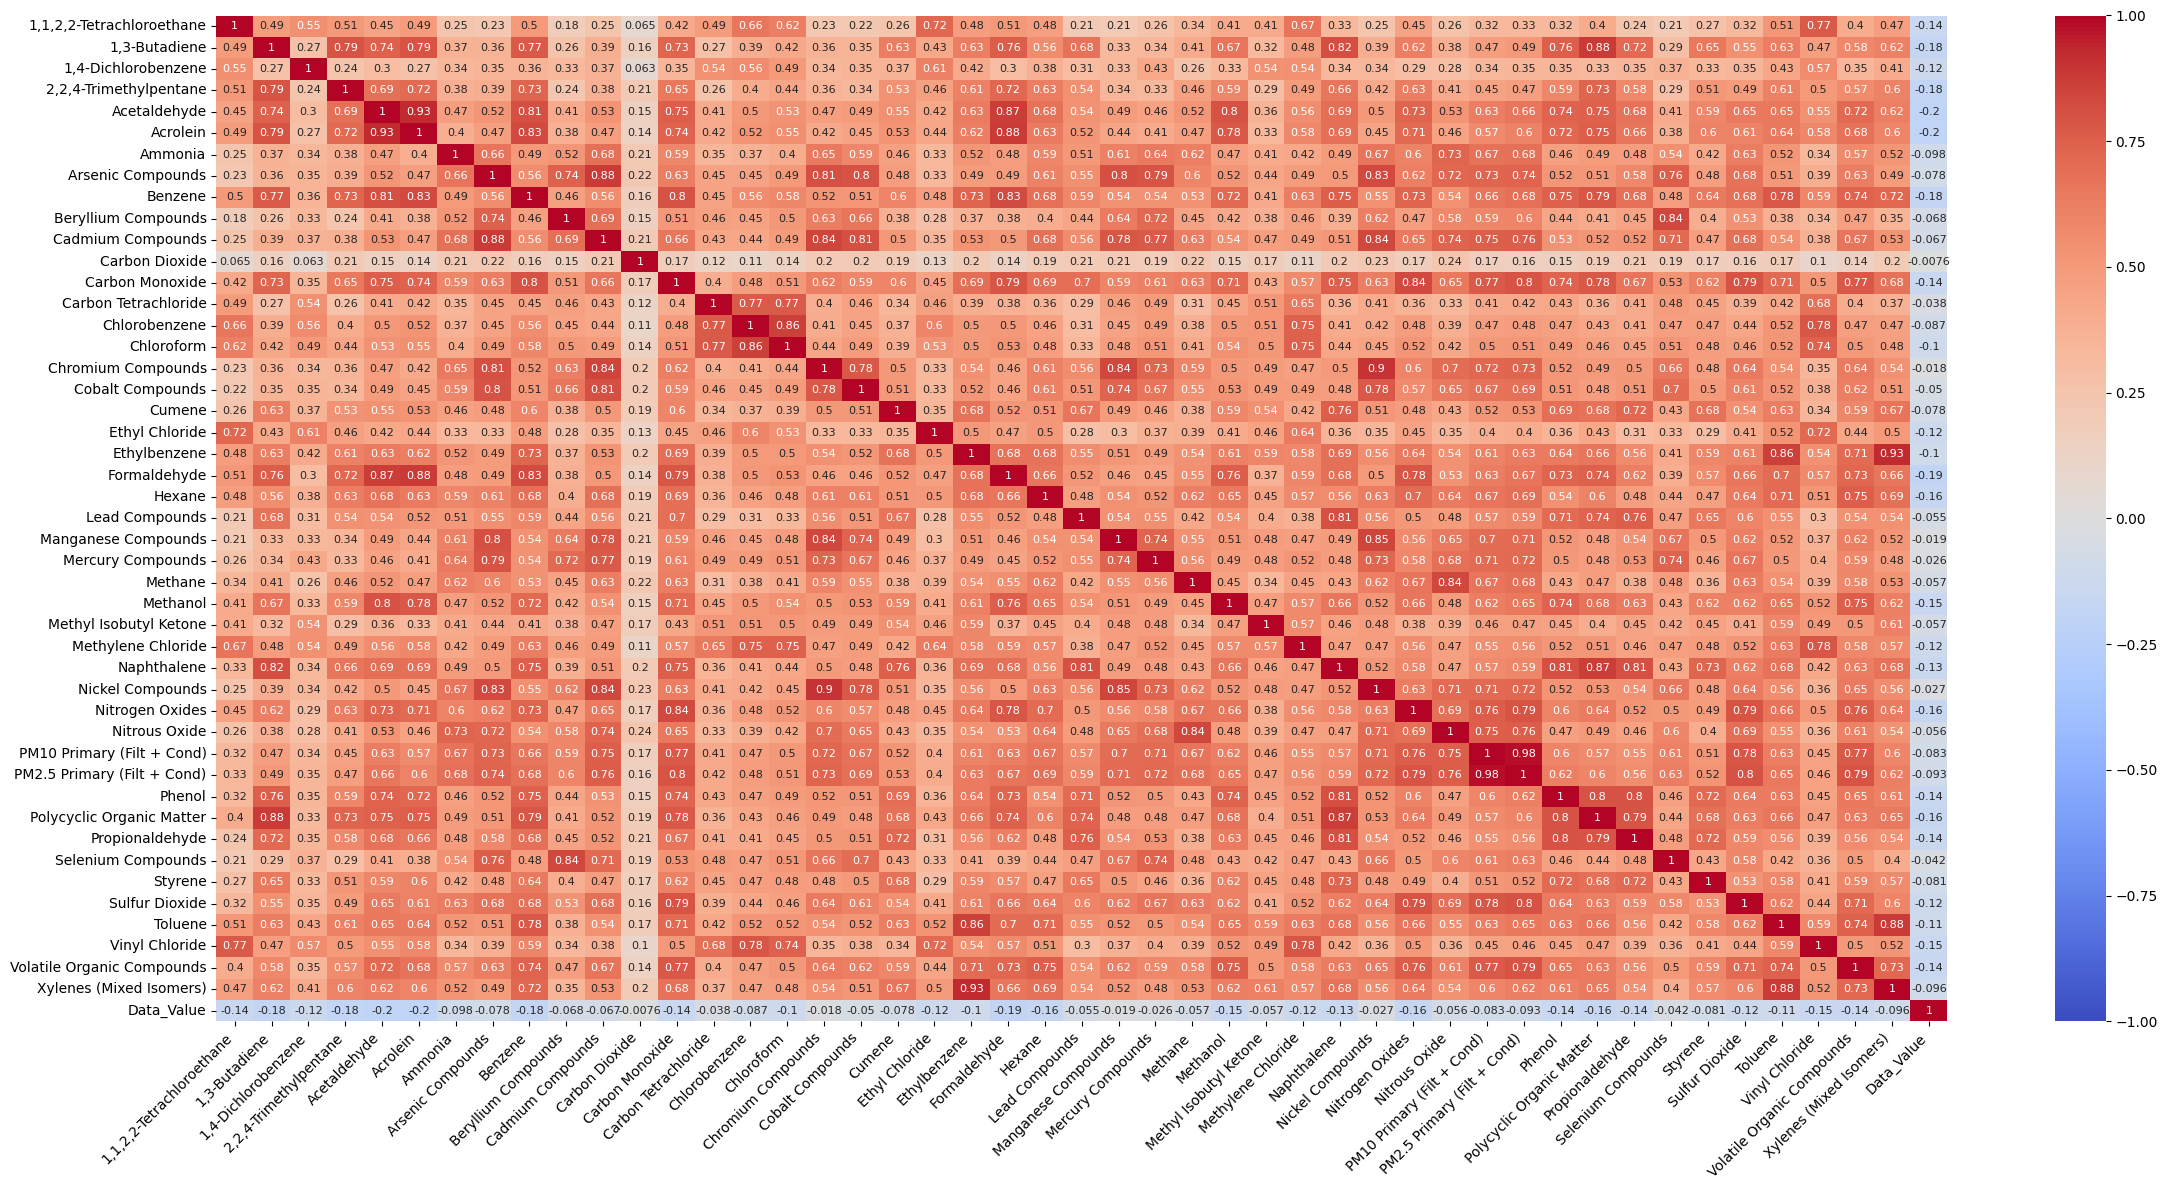

<Figure size 640x480 with 0 Axes>

In [6]:
import os

# Create the directory if it does not exist

corr_matrix = df.corr(method='spearman')
plt.figure(figsize=(24, 12))  # Increase figure size for better spacing
plt.clf()
sns.heatmap(
    corr_matrix,
    annot=True,
    annot_kws={"size": 8},  # Adjust font size of annotations
    cmap='coolwarm',
    vmin=-1,
    vmax=1
)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.tight_layout()  # Automatically adjust layout
plt.show()
plt.savefig('../visualization/images/simple_spearman_corr.png')

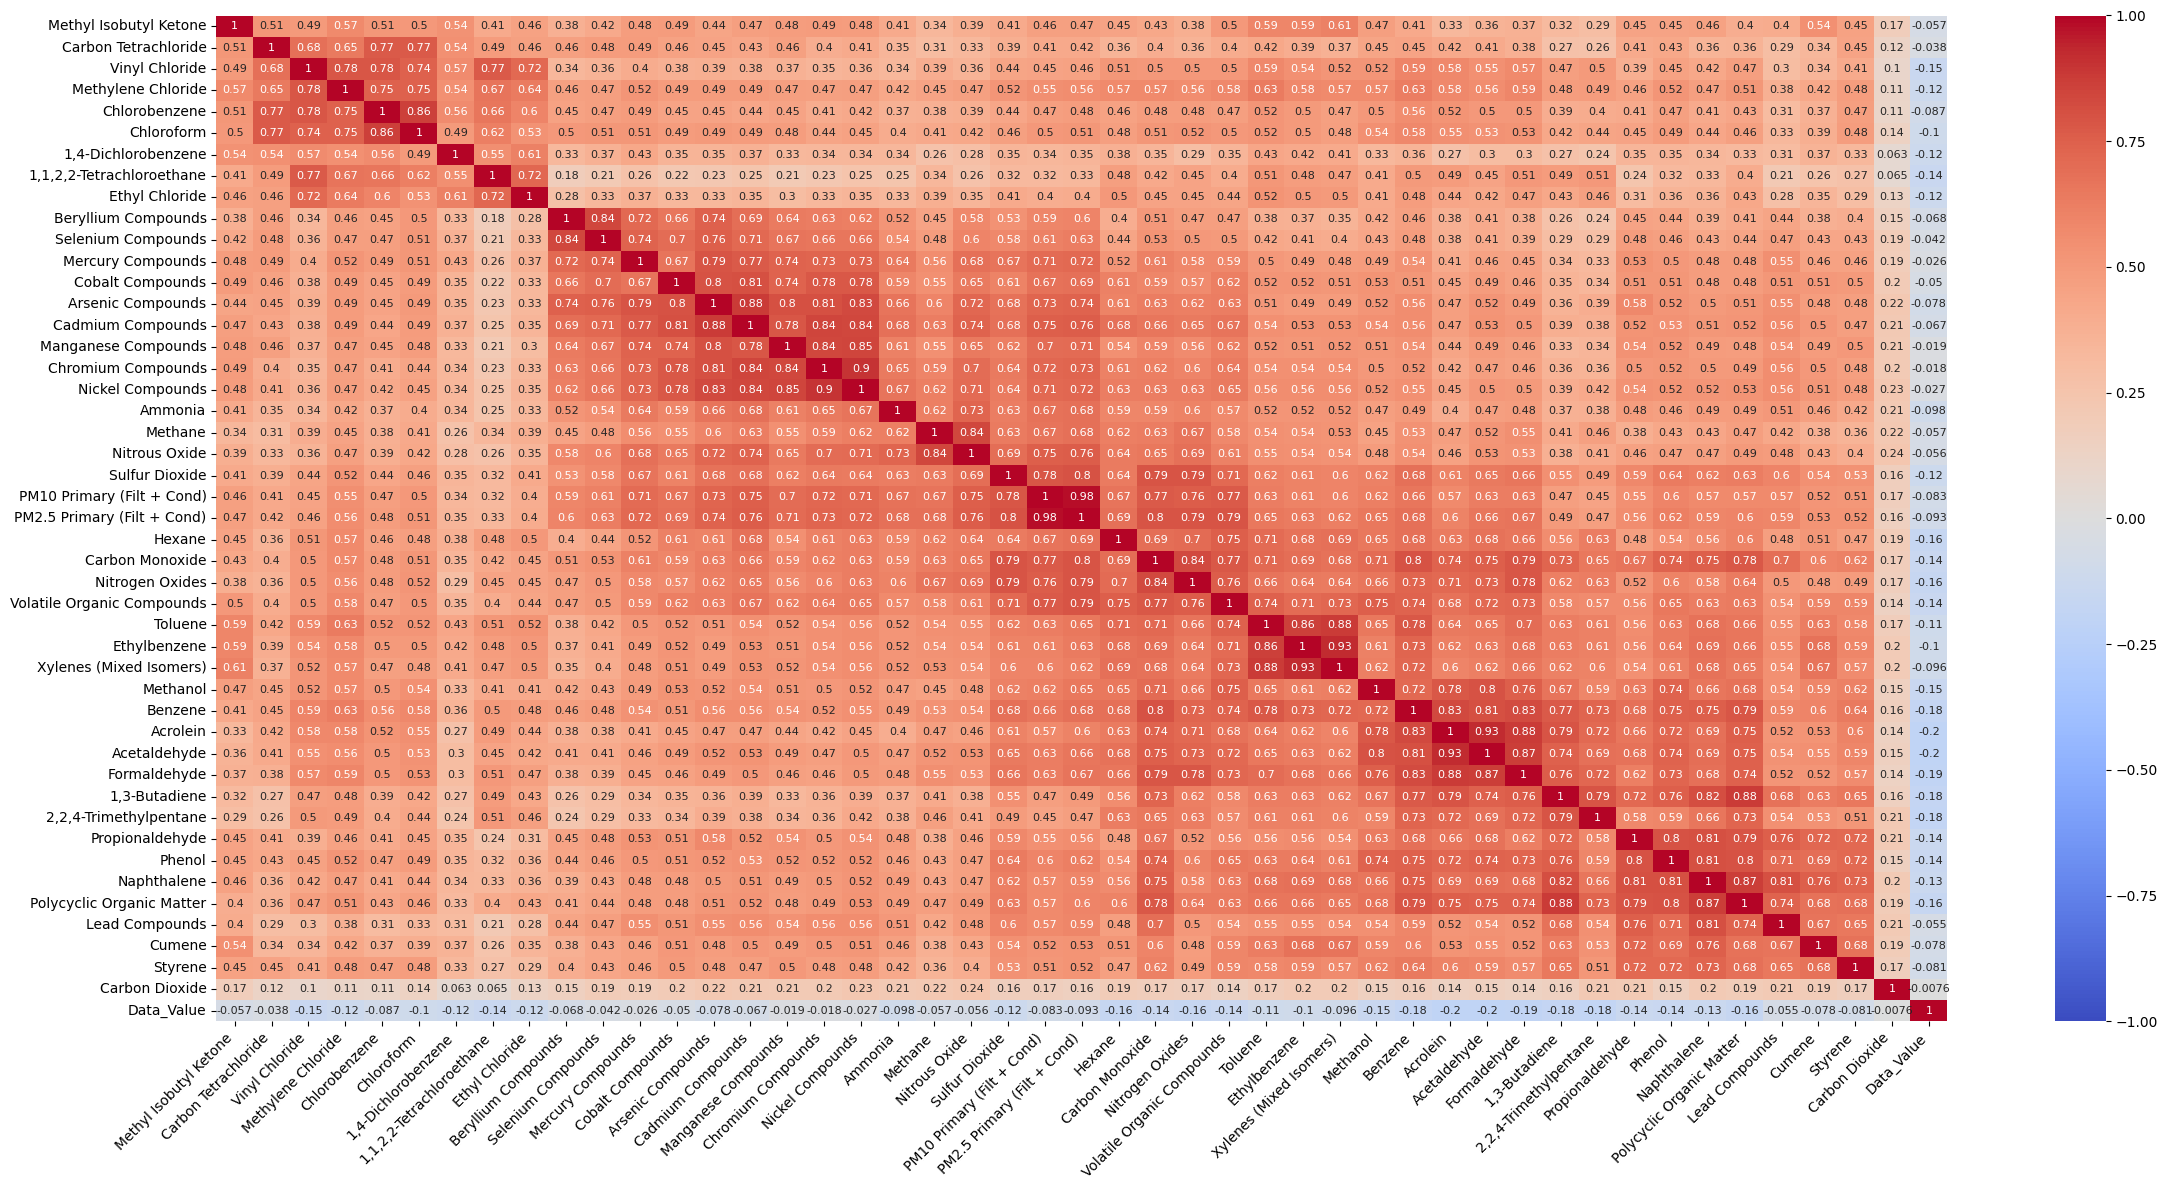

<Figure size 640x480 with 0 Axes>

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, leaves_list

# Compute the correlation matrix
corr_matrix = df.corr(method='spearman')

# Perform hierarchical clustering on the correlation matrix
link = linkage(corr_matrix, method='average')
order = leaves_list(link)

# Reorder the correlation matrix and labels based on clustering
reordered_corr_matrix = corr_matrix.iloc[order, order]
labels = corr_matrix.columns[order]

# Plot the heatmap
plt.figure(figsize=(24, 12))
sns.heatmap(
    reordered_corr_matrix,
    annot=True,
    annot_kws={"size": 8},
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    xticklabels=labels,
    yticklabels=labels
)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
plt.savefig('../visualization/images/spearman_hierach_ordering.png')

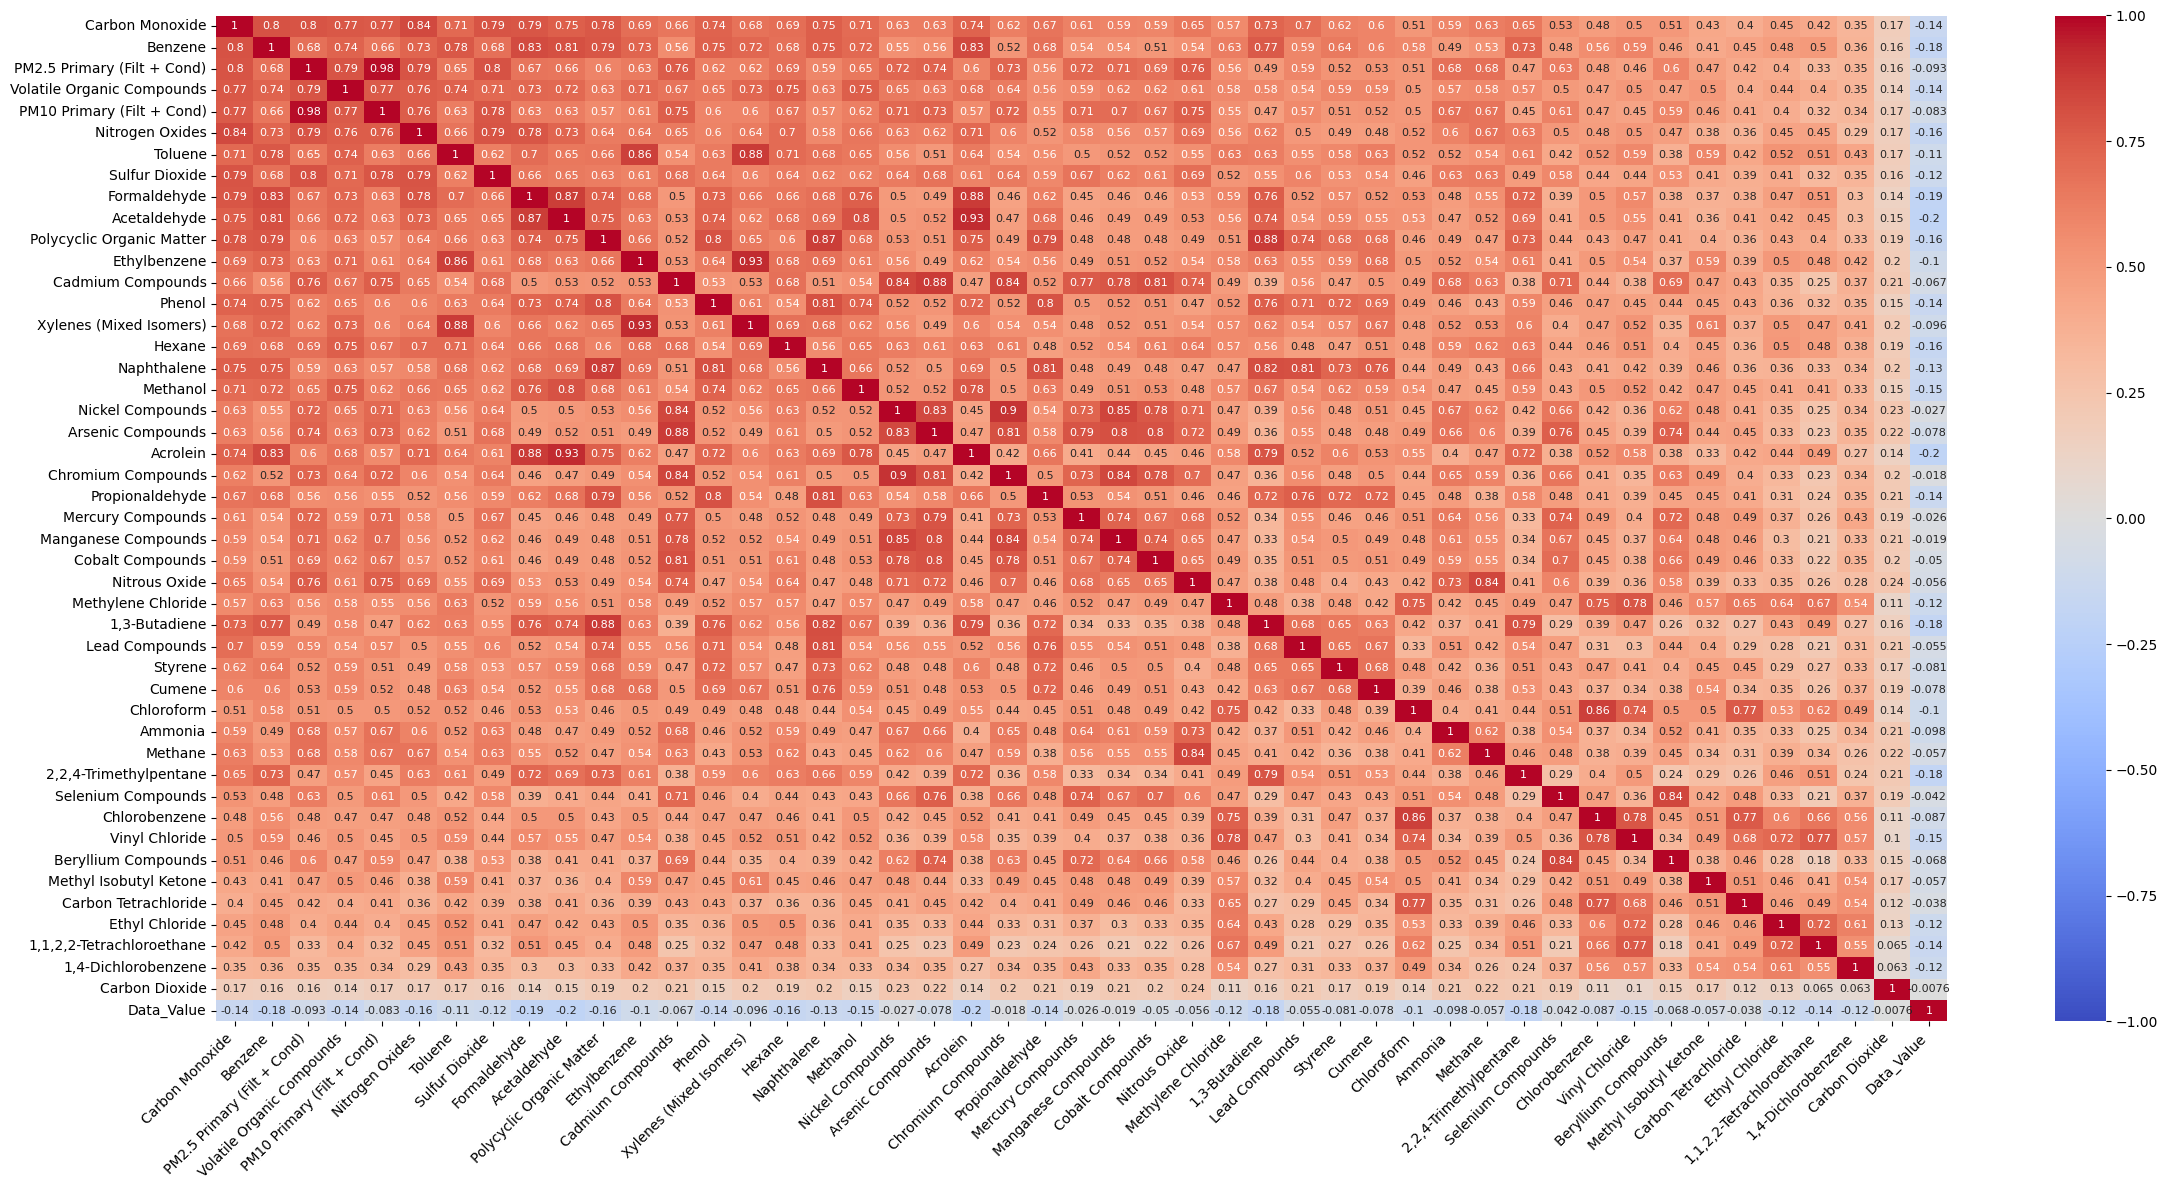

<Figure size 640x480 with 0 Axes>

In [8]:
# Compute the correlation matrix
corr_matrix = df.corr(method='spearman')

# Calculate the sum of correlations for each variable
correlation_sums = corr_matrix.sum(axis=1)

# Sort the correlation matrix by the sums
sorted_indices = correlation_sums.sort_values(ascending=False).index
sorted_corr_matrix = corr_matrix.loc[sorted_indices, sorted_indices]

# Plot the reordered heatmap
plt.figure(figsize=(24, 12))
sns.heatmap(
    sorted_corr_matrix,
    annot=True,
    annot_kws={"size": 8},
    cmap='coolwarm',
    vmin=-1,
    vmax=1
)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
plt.savefig('../visualization/images/spearman_basic_sort.png')

c:\Users\Paul\anaconda3\envs\dvhope-xgb2\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Paul\anaconda3\envs\dvhope-xgb2\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Paul\anaconda3\envs\dvhope-xgb2\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Paul\anaconda3\envs\dvhope-xgb2\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of

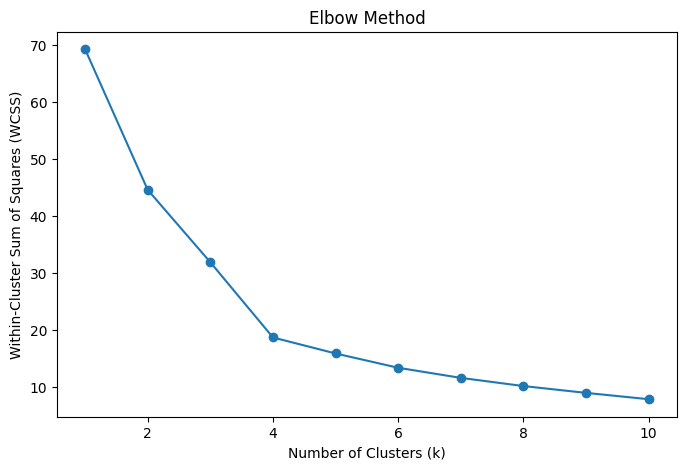

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for k in range(1, 11):  # Try k from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(corr_matrix)
    wcss.append(kmeans.inertia_)  # WCSS

# Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')
plt.show()

c:\Users\Paul\anaconda3\envs\dvhope-xgb2\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


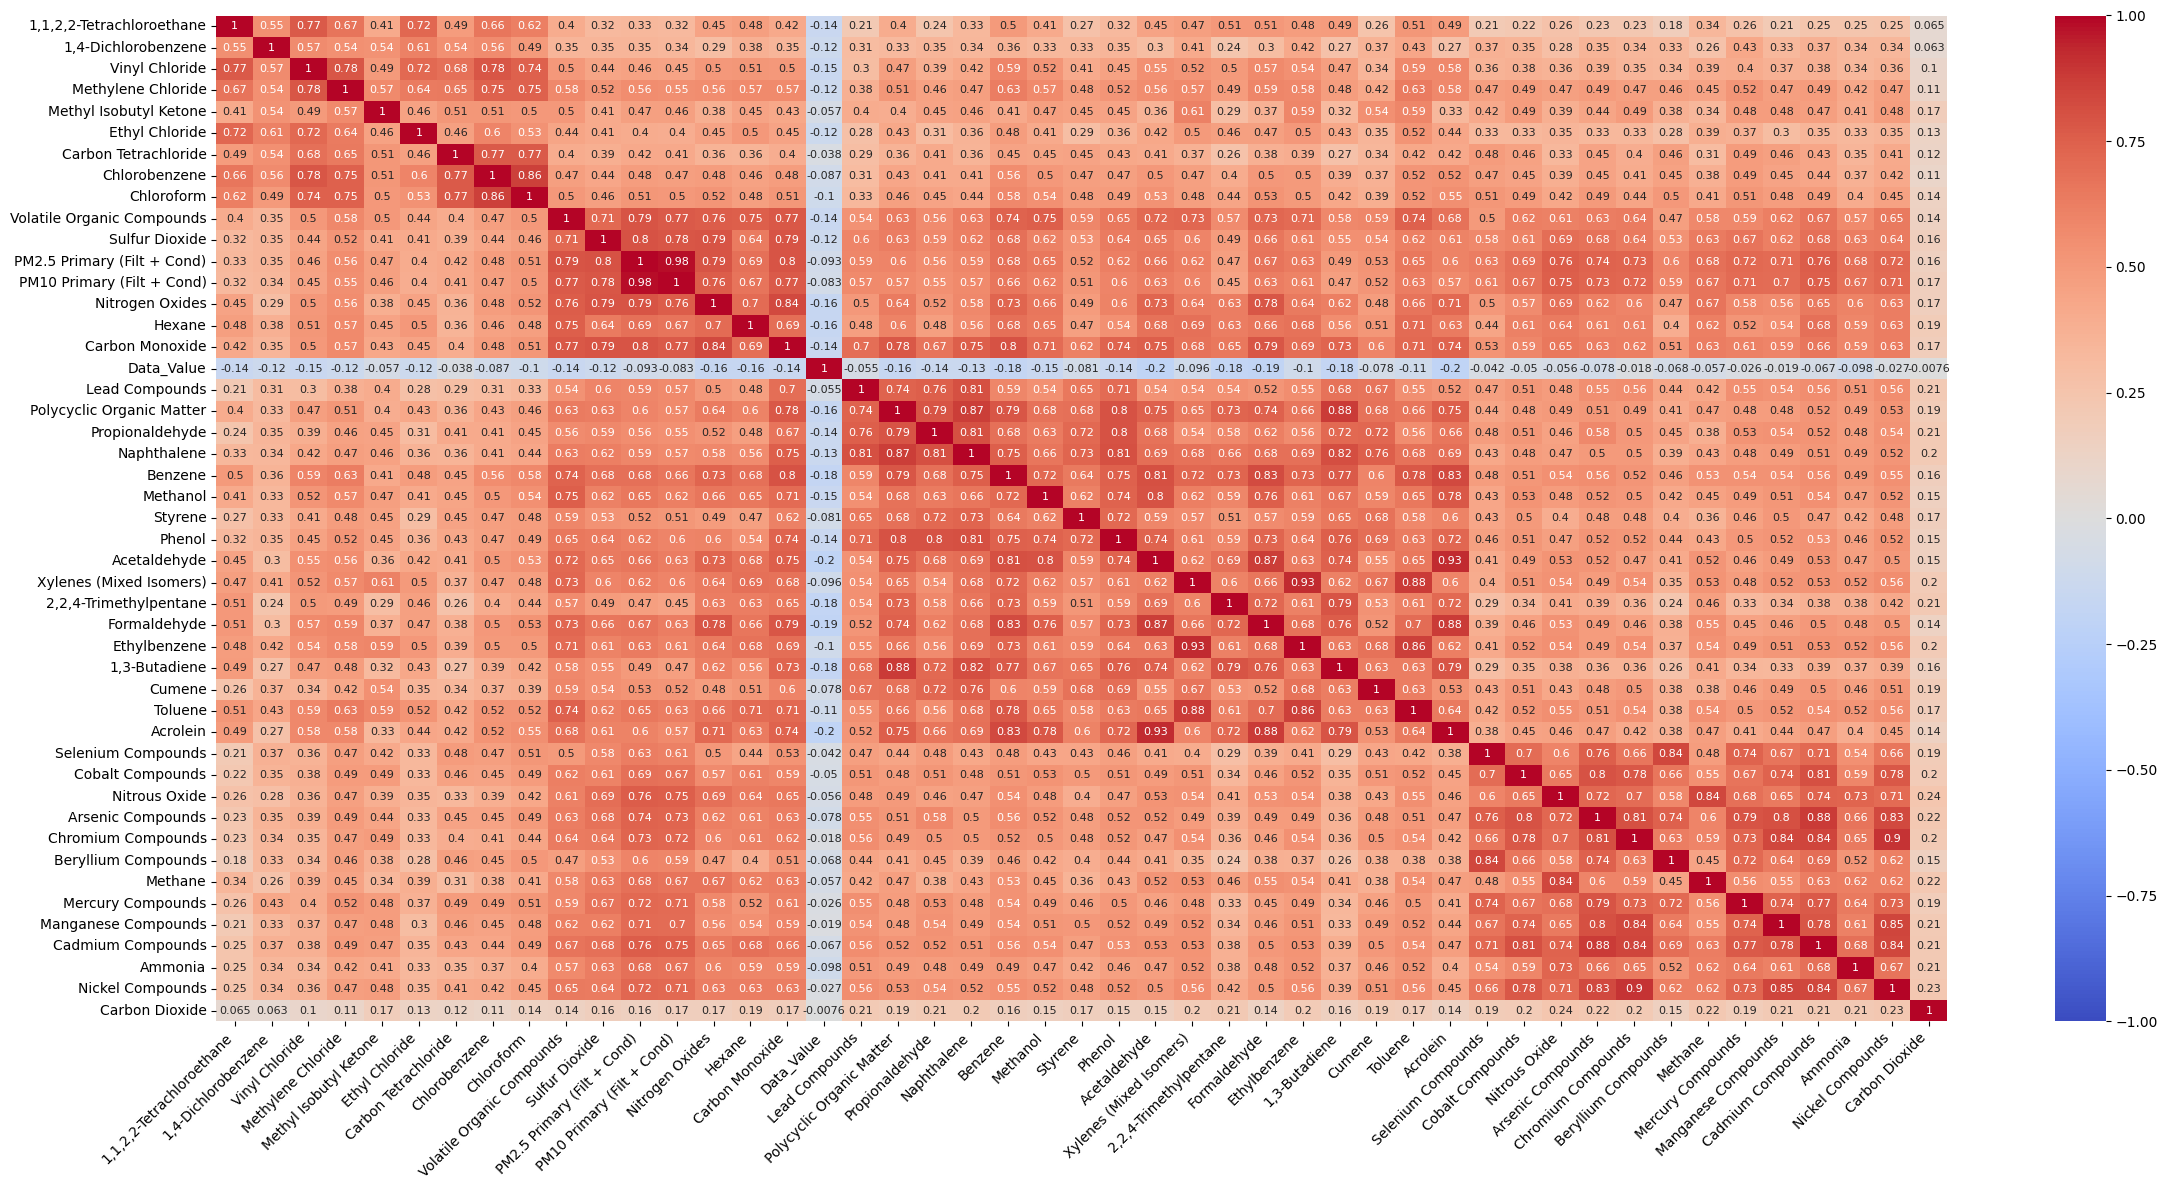

<Figure size 640x480 with 0 Axes>

In [10]:
from sklearn.cluster import KMeans

# Number of clusters (you can experiment with this)
k = 6

# Compute the correlation matrix
corr_matrix = df.corr(method='spearman')

# Apply k-means clustering on the correlation matrix
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(corr_matrix)

# Sort the matrix based on cluster assignments
sorted_indices = np.argsort(clusters)
sorted_corr_matrix = corr_matrix.iloc[sorted_indices, sorted_indices]

# Plot the heatmap
plt.figure(figsize=(24, 12))
sns.heatmap(
    sorted_corr_matrix,
    annot=True,
    annot_kws={"size": 8},
    cmap='coolwarm',
    vmin=-1,
    vmax=1
)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
plt.savefig('../visualization/images/spearman_knn_clustering.png')

In [11]:
# Assuming `df` is your DataFrame and 'target' is your target variable
target = 'Data_Value'  # Replace with your actual target variable name


# Extract correlations with the target variable
target_corr = corr_matrix[target]

sorted_corr = target_corr.abs().sort_values(ascending=False)

# Exclude the target variable itself (correlation = 1)
top_factors = sorted_corr.index[1:]  # Exclude the target itself (index 0)

# Get the top N correlated factors
n = 10  # Number of top factors you want
top_n_factors = top_factors[:n]

# Display the top N factors and their correlations
print("Top factors and correlations:")
print(sorted_corr.loc[top_n_factors])

Top factors and correlations:
Acetaldehyde                 0.199604
Acrolein                     0.197664
Formaldehyde                 0.194274
2,2,4-Trimethylpentane       0.181903
Benzene                      0.179325
1,3-Butadiene                0.179032
Polycyclic Organic Matter    0.160043
Nitrogen Oxides              0.159990
Hexane                       0.158132
Methanol                     0.147529
Name: Data_Value, dtype: float64


In [12]:
df.columns

Index(['State', 'State-County', '1,1,2,2-Tetrachloroethane', '1,3-Butadiene',
       '1,4-Dichlorobenzene', '2,2,4-Trimethylpentane', 'Acetaldehyde',
       'Acrolein', 'Ammonia', 'Arsenic Compounds', 'Benzene',
       'Beryllium Compounds', 'Cadmium Compounds', 'Carbon Dioxide',
       'Carbon Monoxide', 'Carbon Tetrachloride', 'Chlorobenzene',
       'Chloroform', 'Chromium Compounds', 'Cobalt Compounds', 'Cumene',
       'Ethyl Chloride', 'Ethylbenzene', 'Formaldehyde', 'Hexane',
       'Lead Compounds', 'Manganese Compounds', 'Mercury Compounds', 'Methane',
       'Methanol', 'Methyl Isobutyl Ketone', 'Methylene Chloride',
       'Naphthalene', 'Nickel Compounds', 'Nitrogen Oxides', 'Nitrous Oxide',
       'PM10 Primary (Filt + Cond)', 'PM2.5 Primary (Filt + Cond)', 'Phenol',
       'Polycyclic Organic Matter', 'Propionaldehyde', 'Selenium Compounds',
       'Styrene', 'Sulfur Dioxide', 'Toluene', 'Vinyl Chloride',
       'Volatile Organic Compounds', 'Xylenes (Mixed Isomers)', 'Da

In [13]:
by_state_df = df.groupby('State')['Data_Value'].mean()
by_state_df

State
Alabama                 6.782090
Alaska                  6.453571
Arizona                 6.880000
Arkansas                7.026761
California              6.725862
Colorado                7.253968
Delaware                6.900000
District Of Columbia    6.100000
Florida                 7.396923
Georgia                 6.770370
Hawaii                  5.460000
Idaho                   7.170455
Illinois                7.218000
Indiana                 7.283133
Iowa                    7.096970
Kansas                  7.207619
Kentucky                7.422609
Louisiana               6.422222
Maine                   7.400000
Maryland                6.933333
Massachusetts           7.192857
Michigan                7.441463
Minnesota               7.200000
Mississippi             6.265000
Missouri                7.270192
Montana                 7.187500
Nebraska                7.009877
Nevada                  7.018750
New Hampshire           7.580000
New Jersey              6.561905
New 

In [14]:
df.groupby('State').agg('mean')

1,1,2,2-Tetrachloroethane  1,3-Butadiene  \
State                                                            
Alabama                                0.043366       0.618234   
Alaska                                 0.006444       0.832051   
Arizona                                0.037251       1.672233   
Arkansas                               0.011623       0.131647   
California                             0.051354       0.728582   
Colorado                               0.045268       0.957341   
Delaware                               0.007417       1.399997   
District Of Columbia                   0.000000       0.021110   
Florida                                0.030356       0.721146   
Georgia                                0.024196       0.184134   
Hawaii                                 0.005200       1.488580   
Idaho                                  0.005988       0.073525   
Illinois                               0.004917       0.155983   
Indiana                                0.004959       0.081378   
Iowa                                   0.013295       0.120539   
Kansas                                 0.009385       0.235722   
Kentucky                               0.005956       0.180190   
Louisiana                              0.029543       1.075204   
Maine                                  0.002182       0.145777   
Maryland                               0.005791       0.313132   
Massachusetts                          0.000109       0.376709   
Michigan                               0.007905       0.166216   
Minnesota                              0.036940       0.085255   
Mississippi                            0.026798       0.526930   
Missouri                               0.007048       0.111875   
Montana                                0.007437       0.173639   
Nebraska                               0.012816       0.079907   
Nevada                                 0.001902       0.422927   
New Hampshire                          0.010312       0.265646   
New Jersey                             0.015375       0.434182   
New Mexico                             0.042855       1.599465   
New York                               0.007513       0.214812   
North Carolina                         0.025742       0.302576   
North Dakota                           0.007088       0.113499   
Ohio                                   0.010875       0.212729   
Oklahoma                               0.051329       1.360372   
Oregon                                 0.007611       0.236046   
Pennsylvania                           0.021107       0.181624   
Rhode Island                           0.048808       0.172882   
South Carolina                         0.022803       0.247845   
South Dakota                           0.001221       0.027062   
Tennessee                              0.020274       0.185767   
Texas                                  0.026300       1.906214   
Utah                                   0.012146       0.265349   
Vermont                                0.004738       0.048943   
Virginia                               0.010245       0.114269   
Washington                             0.003426       0.400430   
West Virginia                          0.022113       0.070844   
Wisconsin                              0.000650       0.089188   
Wyoming                                0.053219       2.041802   

                      1,4-Dichlorobenzene  2,2,4-Trimethylpentane  \
State                                                               
Alabama                          0.055120                0.105626   
Alaska                           0.000787                0.034048   
Arizona                          0.017293                0.064154   
Arkansas                         0.003365                0.039168   
California                       0.045184                1.697349   
Colorado                         0.000367                0.326519   
Delaware                         0.00

In [15]:
sns.relplot(data=df, x="total_bill", y="tip")

ValueError: Could not interpret value `total_bill` for `x`. An entry with this name does not appear in `data`.